In [1]:
# 필요한 라이브러리 임포트
import tensorflow as tf  # TensorFlow를 사용하여 딥러닝 모델을 구축합니다.
from keras.preprocessing.image import ImageDataGenerator  # 이미지 데이터를 전처리하는 도구를 제공합니다.
from keras.models import Sequential  # Sequential 모델을 사용하여 딥러닝 모델을 구성합니다.
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # 딥러닝 레이어를 정의합니다.
from keras.optimizers import Adam  # Adam 옵티마이저를 사용하여 모델을 최적화합니다.
from google.colab import files  # Google Colab에서 파일을 업로드하고 다운로드하는 데 사용됩니다.
from keras.preprocessing import image  # 이미지 데이터를 처리하는 데 도움을 줍니다.
import numpy as np  # 배열 및 수학 연산을 위한 NumPy를 사용합니다.
import matplotlib.pyplot as plt  # 그래프 및 이미지 표시를 위한 Matplotlib을 사용합니다.

In [ ]:
# Kaggle API를 사용하여 Kaggle 데이터셋을 다운로드 받기 위해 kaggle.json 파일을 업로드하고 설정하는 과정입니다.

# 'wget' 명령어를 사용하여 kaggle.json 파일을 다운로드합니다.
!wget https://raw.githubusercontent.com/BigDeepData/2312_dl/main/etc/kaggle.json

# 이미 존재하는 ~/.kaggle 디렉토리를 삭제합니다.
!rm -r ~/.kaggle

# 새로운 ~/.kaggle 디렉토리를 생성합니다.
!mkdir ~/.kaggle

# 다운로드 받은 kaggle.json 파일을 ~/.kaggle/ 디렉토리로 이동시킵니다.
!mv ./kaggle.json ~/.kaggle/

# kaggle.json 파일에 대한 권한을 변경합니다.
!chmod 600 ~/.kaggle/kaggle.json

# Kaggle API를 사용하여 데이터셋을 다운로드 받습니다.
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

# 다운로드 받은 데이터셋을 압축 해제합니다.
!unzip kaggle-cat-vs-dog-dataset.zip

In [5]:
# 이미지 데이터 증강을 위해 ImageDataGenerator를 설정합니다.

# datagen = ImageDataGenerator(
#     rescale=1./255,                # 이미지의 픽셀 값을 0과 1 사이로 스케일링합니다.
# )
datagen = ImageDataGenerator(
    rescale=1./255,                # 이미지의 픽셀 값을 0과 1 사이로 스케일링합니다.
    rotation_range=40,             # 랜덤하게 이미지를 최대 40도 회전합니다.
    width_shift_range=0.2,         # 이미지를 수평으로 최대 20% 이동시킵니다.
    height_shift_range=0.2,        # 이미지를 수직으로 최대 20% 이동시킵니다.
    shear_range=0.2,               # 이미지를 최대 20% 기울입니다.
    zoom_range=0.2,                # 이미지를 최대 20% 확대/축소합니다.
    horizontal_flip=True,          # 수평으로 랜덤하게 이미지를 뒤집습니다.
    fill_mode='nearest',           # 회전 또는 이동으로 인해 생긴 빈 공간을 가장 가까운 픽셀로 채웁니다.
    validation_split=0.2           # 20%의 데이터를 검증(테스트)용으로 예약합니다.
)

In [6]:
# 학습 데이터셋 생성을 위해 ImageDataGenerator로부터 데이터를 생성합니다.

train_generator = datagen.flow_from_directory(
    'kagglecatsanddogs_3367a/PetImages',  # 이미지 파일이 있는 상위 디렉토리 경로를 지정합니다.
    target_size=(150, 150),              # 모든 이미지를 150x150 크기로 조정합니다.
    batch_size=32,                       # 한 번에 생성되는 이미지 배치 크기를 설정합니다.
    class_mode='binary',                 # 바이너리 분류를 수행할 것이므로 'binary'로 설정합니다.
    subset='training'                    # 'training'을 지정하여 학습용 데이터셋을 생성합니다.
)

Found 19968 images belonging to 2 classes.


In [8]:
# CNN 모델을 Sequential 모델로 구축합니다.

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 32개의 3x3 필터를 사용하고 ReLU 활성화 함수를 적용합니다.
    MaxPooling2D(2, 2),  # 2x2 Max Pooling을 수행합니다.
    Conv2D(64, (3, 3), activation='relu'),  # 64개의 3x3 필터를 사용하고 ReLU 활성화 함수를 적용합니다.
    MaxPooling2D(2, 2),  # 2x2 Max Pooling을 수행합니다.
    Conv2D(128, (3, 3), activation='relu'),  # 128개의 3x3 필터를 사용하고 ReLU 활성화 함수를 적용합니다.
    MaxPooling2D(2, 2),  # 2x2 Max Pooling을 수행합니다.
    Conv2D(128, (3, 3), activation='relu'),  # 128개의 3x3 필터를 사용하고 ReLU 활성화 함수를 적용합니다.
    MaxPooling2D(2, 2),  # 2x2 Max Pooling을 수행합니다.
    Flatten(),  # 다차원 텐서를 1차원으로 평탄화합니다.
    Dropout(0.5),  # 50%의 확률로 Dropout을 적용하여 과적합을 방지합니다.
    Dense(512, activation='relu'),  # 512개의 뉴런을 가진 은닉층을 추가하고 ReLU 활성화 함수를 적용합니다.
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력 층, 시그모이드 활성화 함수를 사용합니다.
])

model.summary()  # 모델 구조를 요약하여 출력합니다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [10]:
# 모델을 컴파일합니다.

model.compile(
    loss='binary_crossentropy',       # 이진 분류 문제이므로 binary_crossentropy 손실 함수를 사용합니다.
    optimizer=Adam(learning_rate=1e-4),  # Adam 옵티마이저를 사용하고 학습률(learning rate)을 설정합니다.
    metrics=['accuracy']             # 모델의 성능 지표로 정확도(accuracy)를 사용합니다.
)

In [11]:
# 모델을 학습합니다.

history = model.fit(
    train_generator,       # 학습용 데이터 제너레이터를 입력으로 사용합니다.
    epochs=50              # 전체 에포크 수를 설정합니다. 모델은 총 50번의 에포크 동안 훈련됩니다.
)

Epoch 1/20
100/100 [==============================] - 36s 231ms/step - loss: 0.6910 - accuracy: 0.5103
Epoch 2/20
100/100 [==============================] - 22s 222ms/step - loss: 0.6796 - accuracy: 0.5634
Epoch 3/20
100/100 [==============================] - 22s 219ms/step - loss: 0.6695 - accuracy: 0.5897
Epoch 4/20
 93/100 [==========================>...] - ETA: 1s - loss: 0.6493 - accuracy: 0.6136

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 [==============================] - 24s 239ms/step - loss: 0.6480 - accuracy: 0.6141
Epoch 5/20
100/100 [==============================] - 22s 222ms/step - loss: 0.6365 - accuracy: 0.6334
Epoch 6/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6238 - accuracy: 0.6506
Epoch 7/20
100/100 [==============================] - 26s 256ms/step - loss: 0.6155 - accuracy: 0.6606
Epoch 8/20
100/100 [==============================] - 22s 221ms/step - loss: 0.6120 - accuracy: 0.6594
Epoch 9/20
100/100 [==============================] - 22s 221ms/step - loss: 0.5845 - accuracy: 0.6881
Epoch 10/20
100/100 [==============================] - 24s 238ms/step - loss: 0.5831 - accuracy: 0.6837
Epoch 11/20
100/100 [==============================] - 20s 204ms/step - loss: 0.5788 - accuracy: 0.6847
Epoch 12/20
100/100 [==============================] - 23s 234ms/step - loss: 0.5859 - accuracy: 0.6841
Epoch 13/20
100/100 [==============================] - 25s 244ms/step - loss: 0.5

In [12]:
# 테스트 데이터셋을 위한 ImageDataGenerator를 설정합니다.
test_datagen = ImageDataGenerator(rescale=1./255)  # 이미지 스케일링만 수행합니다.

# 검증(테스트) 데이터셋 생성
test_generator = datagen.flow_from_directory(
    'kagglecatsanddogs_3367a/PetImages',  # 이미지 파일이 있는 상위 디렉토리 경로를 지정합니다.
    target_size=(150, 150),              # 모든 이미지를 150x150 크기로 조정합니다.
    batch_size=32,                       # 한 번에 생성되는 이미지 배치 크기를 설정합니다.
    class_mode='binary',                 # 바이너리 분류를 수행할 것이므로 'binary'로 설정합니다.
    subset='validation'                  # 'validation'을 지정하여 검증용 데이터셋을 생성합니다.
)

# 모델을 test 데이터셋으로 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test 데이터셋에 대한 손실: {test_loss:.2f}")
print(f"Test 데이터셋에 대한 정확도: {test_accuracy:.2f}%")

# test_datagen: 테스트 데이터셋을 위한 ImageDataGenerator를 설정합니다.
# 여기에서는 이미지 스케일링만 수행하여 이미지의 픽셀 값을 0과 1 사이로 스케일링합니다.
# test_generator: 검증(테스트) 데이터셋을 생성합니다.
# 이 데이터셋은 이미지 파일이 있는 디렉토리에서 이미지를 로드하고, 크기를 조정하며, 배치로 나누고, 이진 분류를 위한 레이블을 생성합니다.
# model.evaluate(test_generator): 모델을 테스트 데이터셋으로 평가합니다.
# 이 함수는 테스트 데이터셋을 사용하여 손실과 정확도를 계산하고 반환합니다.
# 마지막으로 손실과 정확도를 출력하여 모델의 성능을 확인합니다.

Found 4991 images belonging to 2 classes.
156/156 [==============================] - 46s 295ms/step - loss: 0.5111 - accuracy: 0.7441
Test 데이터셋에 대한 손실: 0.51
Test 데이터셋에 대한 정확도: 74.41%


Saving _126241775_getty_cats.png to _126241775_getty_cats (3).png
Saving 09e904cb8f26f.png to 09e904cb8f26f (1).png
Saving 62f9a36ea3cea.jpg to 62f9a36ea3cea (4).jpg


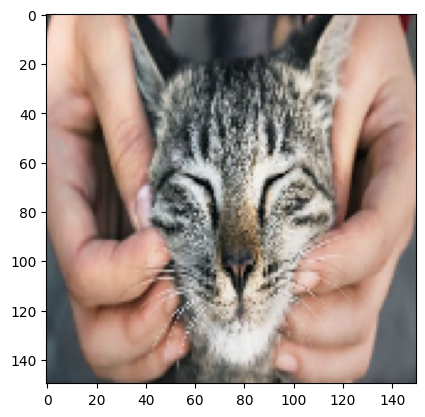

1/1 [==============================] - 0s 18ms/step
[[1.]]
이미지는 개로 분류됩니다. 확률: 100.00%


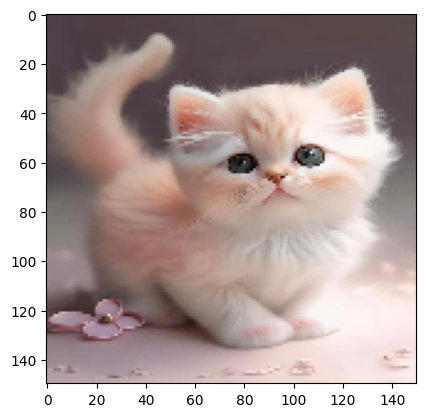

1/1 [==============================] - 0s 17ms/step
[[1.]]
이미지는 개로 분류됩니다. 확률: 100.00%


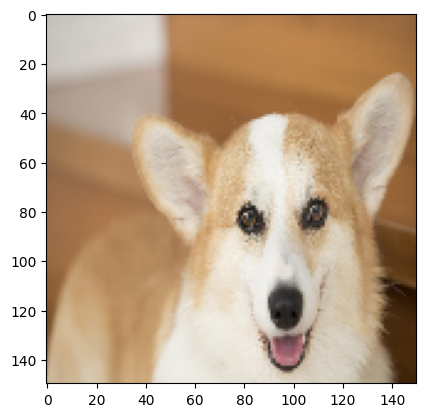

1/1 [==============================] - 0s 19ms/step
[[1.]]
이미지는 개로 분류됩니다. 확률: 100.00%


In [20]:
# 이미지 분류 함수 정의
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # 이미지를 불러와서 크기를 조정합니다.
    img_array = image.img_to_array(img)  # 이미지를 넘파이 배열로 변환합니다.
    img_array = tf.expand_dims(img_array, 0)  # 이미지를 배치로 변환합니다.

    predictions = model.predict(img_array)  # 모델을 사용하여 이미지를 분류합니다.
    score = predictions[0]
    print(predictions)
    if score > 0.5:
        print(f"이미지는 개로 분류됩니다. 확률: {100 * float(score):.2f}%")
    else:
        print(f"이미지는 고양이로 분류됩니다. 확률: {100 * float(1 - score):.2f}%")

# 이미지 업로드 및 예측
uploaded = files.upload()  # 이미지 파일을 업로드합니다.

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

    predict_image(path)  # 업로드한 이미지에 대한 예측을 수행합니다.

# predict_image(image_path): 이미지 파일의 경로를 입력으로 받아 해당 이미지를 모델을 사용하여 개 또는 고양이로 분류하는 함수입니다.
# 이미지를 로드하고 넘파이 배열로 변환한 후, 모델을 사용하여 예측을 수행하고 확률을 출력합니다.
# uploaded = files.upload(): 이미지 파일을 업로드하기 위한 코드입니다. 업로드한 이미지는 uploaded 변수에 저장됩니다.
# for fn in uploaded.keys():: 업로드한 이미지 파일을 하나씩 순회하면서 예측을 수행합니다.
# 마지막으로 업로드한 이미지를 표시하고, predict_image 함수를 호출하여 해당 이미지를 분류합니다. 결과는 확률과 함께 출력됩니다.